<a href="https://colab.research.google.com/github/ssachii/pytorch-mnist/blob/main/handwritten_digit_recognition_io.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch # for tensor computations, building neural networks
import torchvision # for accessing popular datasets
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms # for dataset handling, data transformations
from torch import nn, optim # neural network module, optimisation module

In [2]:
# create a pipeline of transformations to preprocess the image data.
# `transforms.Compose` chains multiple transformations together, where the output of one becomes the input for the next.
# tensors = multidensional arrays; grayscale= 2d tensor, colored= 3d tensor

transform = transforms.Compose([
    # 1. convert the image to a PyTorch Tensor.
    # this automatically converts a PIL image or NumPy array with pixel values in the
    # range [0, 255] to a FloatTensor of shape (channels, height, width)
    # with values scaled to the range [0.0, 1.0].
    transforms.ToTensor(),

    # 2. normalize the tensor image.
    # the formula is: output = (input - mean) / std
    # using a mean of 0.5 and a standard deviation of 0.5, this effectively maps the input range from [0.0, 1.0] to [-1.0, 1.0].
    # the arguments (0.5,) and (0.5,) are tuples for each channel. since there's only one value, this is designed for single-channel (grayscale) images.
    transforms.Normalize((0.5,), (0.5,)),
    ])


# Brightness and Contrast: Adjusting the brightness and contrast of an image is one part of normalization. This ensures that all images in a dataset have consistent lighting conditions, making them easier to compare and analyze.
# Scaling: Scaling refers to resizing images to a uniform size or resolution. This step ensures that all images have the same dimensions, which is essential for feeding them into machine learning models.
# Color Channels: For color images, it's important to normalize the color channels. This can involve scaling the color values to a specific range, such as between 0 and 1, or standardizing them to have a mean of 0 and a standard deviation of 1.
# Centering: Centering involves shifting the pixel values so that they have a common reference point. For example, subtracting the mean pixel value of the entire dataset can center the data around zero.
# Standardization: Standardization is about making the pixel values have a similar scale. This is often done by dividing the pixel values by the standard deviation of the entire dataset.
# Channel-wise Normalization: In color images, it's common to perform normalization separately for each color channel (e.g., red, green, and blue). This ensures that color information is consistent.
# Data Type Conversion: Converting pixel values to a specific data type, such as floating-point numbers, can also be part of normalization.


In [3]:
# 1. load the entire MNIST training dataset.
# the `transform` pipeline defined earlier is applied to each image as it's loaded.
full_trainset = datasets.MNIST('full_trainset', download=True, train=True, transform=transform)

# 2. define the sizes for our data split (80% train, 10% validation, 10% test).
train_size = int(0.8 * len(full_trainset))
val_size = int(0.1 * len(full_trainset))
test_size = len(full_trainset) - (train_size + val_size)

# 3. randomly split the full dataset into three separate subsets.
trainset, valset, testset = torch.utils.data.random_split(full_trainset, [train_size, val_size, test_size])

# 4. create dataloaders for each subset.
# a DataLoader is an iterator that provides batches of data, handles shuffling, and can even load data in parallel.
# the training loader shuffles the data at the beginning of each epoch.
# this is crucial to ensure the model doesn't learn from the order of the data, helping it generalize better.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# for the validation and test sets, we do not shuffle the data.
# this ensures that the model is evaluated on the exact same sequence of data every time, providing consistent and comparable performance metrics.
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False)  # no need to shuffle validation set
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


# Uses of a DataLoader:
# Batching: A DataLoader divides a dataset into smaller batches or mini-batches. Each batch contains a fixed number of data samples. Batching is essential for training deep learning models because it allows you to process a manageable amount of data at a time, which is often more memory-efficient and can lead to faster training.
# Shuffling: Many machine learning models benefit from seeing data in a random order during each training epoch. A DataLoader can shuffle the data automatically before creating batches. Shuffling helps prevent the model from learning patterns based on the order of the data and ensures that the model generalizes better.
# Parallel Data Loading: If you have access to multiple CPU cores or GPUs, DataLoader can load and preprocess data samples in parallel. This parallelism can significantly speed up the training process, especially when dealing with large datasets.
# Data Transformation: DataLoader allows you to apply data transformations to each batch of data on the fly. Common transformations include resizing images, normalizing pixel values, and converting data to tensors. These transformations can be specified when creating the DataLoader.
# Iterating Over the Dataset: Once a DataLoader is created, you can use it as an iterator to iterate over the batches of data in a for loop. This makes it easy to feed batches of data to your machine learning model during training or evaluation.

# Shuffling the training dataset is essential because it helps the model generalize better.
# It prevents the model from learning patterns based on the order of the data points.
# Shuffling ensures that each batch of training data consists of randomly selected samples from the entire dataset,
# which helps the model learn a more robust representation of the data.


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 484kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.37MB/s]


In [4]:
# create an iterator object from the training dataloader to loop through the data.
dataiter = iter(trainloader)
# retrieve the next batch (a tuple of images and labels) from the iterator.
images, labels  = next(dataiter)
# print the shape (dimensions) of the images tensor.
print(images.shape)
# print the shape of the labels tensor.
print(labels.shape)


# The shape provides information about the number of images in the batch, he number of color channels (if applicable), and the dimensions of each image (e.g., height and width).
# The specific numbers will depend on the batch size and the size of the individual images.
# The shape of the labels tensor typically corresponds to the number of labels in the batch, which should match the batch size.


torch.Size([64, 1, 28, 28])
torch.Size([64])


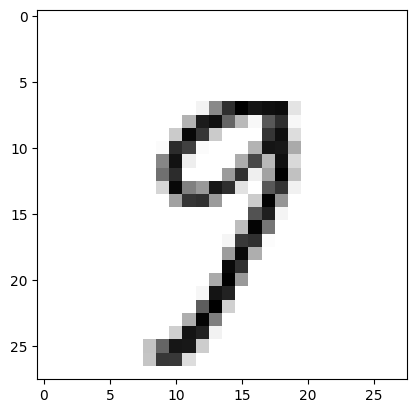

In [5]:
# display the first image from the batch using matplotlib.
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

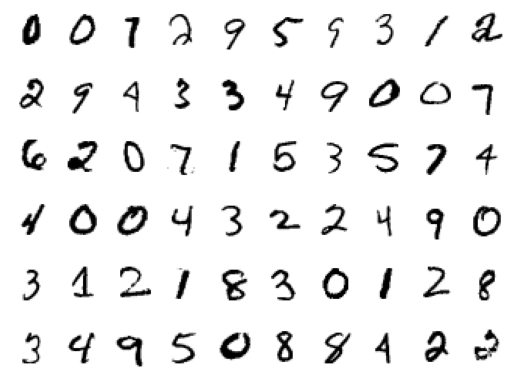

In [6]:
# to print a grid of 60 images from dataset
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [7]:
# --- Define the Network Architecture Parameters ---

# input layer size: 784 neurons, corresponding to the 784 pixels in a flattened 28x28 image.
# in this context, it suggests that the model expects input data with 784 features.
# this size is often used for handling flattened 28x28 pixel images (common in MNIST digit recognition) since 28x28 = 784.
input_size = 784

# hidden layers: a list defining the number of neurons in each hidden layer.
# this architecture has two hidden layers with 128 and 64 neurons, respectively.
hidden_sizes = [128, 64]

# output layer size: 10 neurons, one for each possible class (the digits 0 through 9).
output_size = 10


# --- Build the Neural Network Model ---

# use nn.Sequential to create a simple feed-forward network. it acts as a container where data flows sequentially through the defined layers.
model = nn.Sequential(
    # 1. first hidden layer and its activation function.
    nn.Linear(input_size, hidden_sizes[0]),
    nn.ReLU(),

    # 2. second hidden layer and its activation function.
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.ReLU(),

    # 3. the output layer, which produces raw scores (logits) for each class.
    nn.Linear(hidden_sizes[1], output_size),

    # 4. the final activation function to convert logits to log probabilities.
    nn.LogSoftmax(dim=1)
)

# print the model's architecture to see a summary of the layers.
print(model)


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [8]:
# --- Demonstrate a Single Forward Pass (Before Training) ---

# 1. define the loss function: Negative Log Likelihood Loss (NLLLoss).
# this is the ideal loss function to pair with the LogSoftmax activation function in our model's final layer.
criterion = nn.NLLLoss()

# 2. get one batch of images and labels to test the workflow.
images, labels = next(iter(trainloader))

# 3. flatten the batch of images from a 2D grid [28, 28] to a 1D vector [784].
# this is required because our network's first linear layer expects a flat vector as input.
images = images.view(images.shape[0], -1)

# 4. perform a forward pass: push the images through the model to get the output log probabilities.
logps = model(images)

# 5. calculate the loss: measure the difference between the model's predictions (logps) and the true target labels.
loss = criterion(logps, labels)



# After this code is executed, you will have the loss value (loss),
# which represents how well or poorly the model is performing on the current batch of training data.
# The goal during training is to minimize this loss by adjusting the
# model's parameters (weights and biases) through techniques like backpropagation and gradient descent,
# so that the model becomes better at making accurate predictions.

# Sending the images through the model without training it serves several purposes:
# Initialization: Before training, the model's parameters (weights and biases) are typically initialized randomly or with some predefined values.
# By forwarding a batch of images through the untrained model, you can observe how the model's initial random predictions look.
# This can be helpful for debugging and understanding the model's behavior at the beginning of training.

# Understanding Initial Predictions: Examining the initial predictions can provide insights into whether the model is starting with some biases
# or if it's making random predictions. This can help you gauge the starting point of the training process.

# Loss Computation: In the code you provided, you calculate the loss (loss.backward()) even before training.
# While this loss doesn't mean much in terms of model performance at this stage (since the model hasn't learned anything yet),
# it's computed to set up the backward pass. During training, the backward pass is used to calculate gradients,
# which guide the parameter updates to minimize this loss.

# Debugging: If there are any issues with the model's architecture, shape compatibility, or data preprocessing, forwarding a batch of data
# through the untrained model can help identify these issues early on.
# It's a common practice to perform a "sanity check" on the model and the data pipeline at the beginning of the training process.

In [9]:
# --- Demonstrate the Backpropagation Step ---

# 1. check the gradients of the first layer's weights (model[0].weight) before the backward pass.
# when you initialize a model, the gradients are typically set to None or zero.
print('Before backward pass: \n', model[0].weight.grad)

# 2. perform backpropagation.
# this line computes gradients for all the learnable parameters in the model, including the weights and biases, with respect to the loss.
# calculates how much each parameter should be adjusted to minimize the loss.
# it populates the `.grad` attribute for each parameter.
loss.backward()

# 3. check the gradients again after the backward pass.
# the `.grad` attribute now contains a tensor representing the gradients, which will be used by the optimizer to update the model's weights.
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0040,  0.0040,  0.0040,  ...,  0.0040,  0.0040,  0.0040],
        [-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030],
        [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
        ...,
        [ 0.0022,  0.0022,  0.0022,  ...,  0.0022,  0.0022,  0.0022],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [-0.0017, -0.0017, -0.0017,  ..., -0.0017, -0.0017, -0.0017]])


In [10]:
# --- Initialize the Optimizer and Training Parameters ---

# initialize the Stochastic Gradient Descent (SGD) optimizer.
# `model.parameters()`: specifies which tensors the optimizer should update.
# `lr=0.003`: the learning rate, controlling the size of the weight update steps.
# `momentum=0.9`: helps the optimizer accelerate in the relevant direction and dampens oscillations.
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

# initialize lists to store performance metrics for later plotting.
losses = []
accuracies = []
val_losses = []
val_accuracies = []

time0 = time()
epochs = 8

# starts the main training and validation loop
for e in range(epochs):
    running_loss = 0
    correct_count = 0

    # loop over each batch of data from the training loader.
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1) # flatten images into a 1D vector.

        # the core training steps for a single batch:
        optimizer.zero_grad() # clear gradients from the previous pass.
        output = model(images) # forward pass: get model's predictions.
        loss = criterion(output, labels) # calculate the loss.
        loss.backward() # backward pass: compute gradients.
        optimizer.step() # update the model's weights.
        running_loss += loss.item()

        # calculate training accuracy for the batch.
        _, predicted = torch.max(output.data, 1)
        correct_count += (predicted == labels).sum().item()

    # calculate and store average metrics for the full training epoch.
    avg_loss = running_loss / len(trainloader)
    accuracy = correct_count / len(trainloader.dataset)
    losses.append(avg_loss)
    accuracies.append(accuracy)

    # print epoch results for training
    print(f"Epoch {e+1}/{epochs} - Training loss: {avg_loss:.4f}, Training Accuracy: {accuracy:.4f}")

    # validation loop
    model.eval()  # set the model to evaluation mode
    val_loss = 0
    val_correct_count = 0

    # disable gradient calculations to save memory and speed up computation.
    with torch.no_grad():
        for images, labels in valloader:
            images = images.view(images.shape[0], -1)
            output = model(images)
            val_loss += criterion(output, labels).item()

            # calculate validation accuracy.
            _, predicted = torch.max(output.data, 1)
            val_correct_count += (predicted == labels).sum().item()

    # calculate average validation loss and accuracy
    avg_val_loss = val_loss / len(valloader)
    val_accuracy = val_correct_count / len(valloader.dataset)

    # append validation metrics to lists
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

    # print epoch results for validation
    print(f"Epoch {e+1}/{epochs} - Validation loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/8 - Training loss: 0.7310, Training Accuracy: 0.7880
Epoch 1/8 - Validation loss: 0.3373, Validation Accuracy: 0.9022
Epoch 2/8 - Training loss: 0.3105, Training Accuracy: 0.9093
Epoch 2/8 - Validation loss: 0.2780, Validation Accuracy: 0.9133
Epoch 3/8 - Training loss: 0.2502, Training Accuracy: 0.9253
Epoch 3/8 - Validation loss: 0.2436, Validation Accuracy: 0.9245
Epoch 4/8 - Training loss: 0.2065, Training Accuracy: 0.9382
Epoch 4/8 - Validation loss: 0.1985, Validation Accuracy: 0.9408
Epoch 5/8 - Training loss: 0.1729, Training Accuracy: 0.9491
Epoch 5/8 - Validation loss: 0.1606, Validation Accuracy: 0.9512
Epoch 6/8 - Training loss: 0.1497, Training Accuracy: 0.9552
Epoch 6/8 - Validation loss: 0.1445, Validation Accuracy: 0.9562
Epoch 7/8 - Training loss: 0.1301, Training Accuracy: 0.9613
Epoch 7/8 - Validation loss: 0.1303, Validation Accuracy: 0.9587
Epoch 8/8 - Training loss: 0.1159, Training Accuracy: 0.9655
Epoch 8/8 - Validation loss: 0.1225, Validation Accuracy:

In [11]:
# saves the model locally
torch.save(model, './my_mnist_modelfinal.pt')

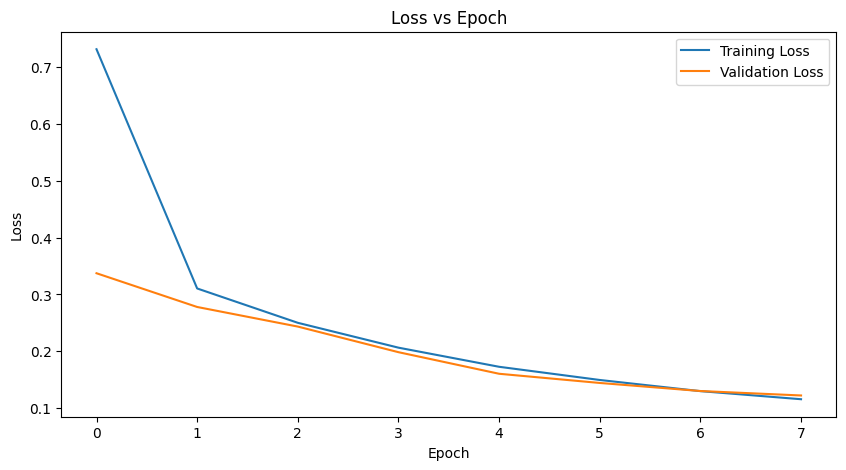

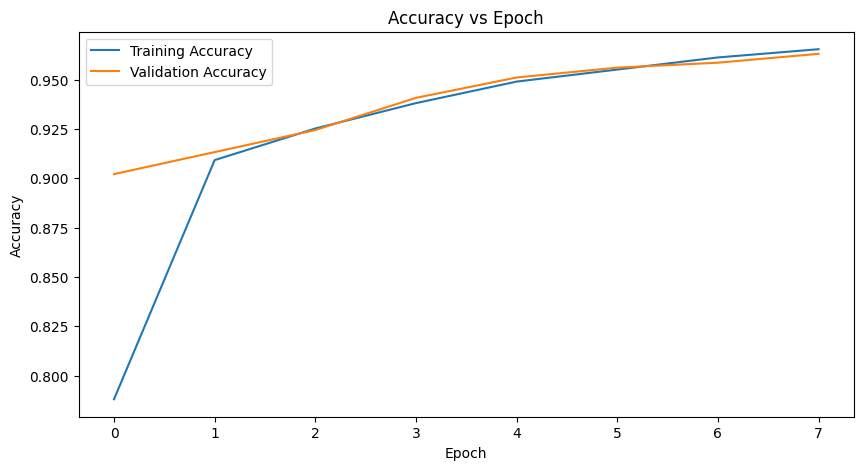

In [12]:
# plot loss vs epoch for both training and validation.
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# plot accuracy vs epoch for both training and validation.
plt.figure(figsize=(10, 5))
plt.plot(accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title("Accuracy vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# if using terminal/vscode, make sure libraries are installed

# Diagnosing Model Fit from Loss Curves
# By comparing the training and validation loss, you can diagnose if the model is a good fit, overfitting, or underfitting.
# Good Fit: Both training and validation loss decrease and stabilize at a low value. There is a small, consistent gap between them, known as the generalization gap.
# Overfitting: The training loss continues to decrease while the validation loss flattens out or starts to increase.
# This means the model has memorized the training data and performs poorly on new, unseen data.
# The point where the validation loss begins to rise is a good indicator of when to stop training.
# Underfitting: The training loss remains high and does not decrease significantly.
# This indicates the model is too simple to learn the patterns in the data, or that training was stopped too early.

# Effect of Learning Rate on Training Loss
# The shape of the training loss curve can give you hints about the learning rate (lr).
# Good Learning Rate: The loss decreases exponentially and smoothly, settling at a stable minimum.
# Learning Rate is Too High: The loss decreases very rapidly at first but then bounces around erratically or even increases, failing to find a stable minimum.
# Learning Rate is Too Low: The loss decreases very slowly in a near-straight line. The model is learning, but it will take an excessive number of epochs to converge.

# Analysis from Output Graphs
# For the loss vs epoch graph, a straight line would signify underfit, meaning the model had high losses or was unable to learn the dataset at all.
# A line that does not flatten towards the end is another example of underfitting, because it indicates that the model is capable of further learning
# and possible further improvements and that the training process was halted prematurely.
# Overfitting occurs when the plot of training loss continues to decrease with experience or the plot of validation loss decreases to a point and starts increasing again.
# The inflection point (or random fluctuations) in validation loss may be the point at which training could be halted as experience after that point shows the dynamics of overfitting.
# A good fit is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values.
# The loss of the model will almost always be lower on the training dataset than the validation dataset.
# This means that we should expect some gap between the train and validation loss learning curves. This gap is referred to as the generalization gap.
# Learning rates:
# Rapidly increases- very high learning rate
# Rapidly decreases before reaching stability- high learning rate
# Continuously decreases (slightly straighter line)- low learning rate
# Exponentially decreases (curved downward)- good learning rate

# Many more comparisons can be done by judging the gap between the training and validation curve, scores for each can be calculated
# using different metrics such as F1 score, accuracy error, mean square error, mean absolute error, etc.

In [13]:
# function for viewing an image and it's predicted classes.
def view_classify(img, ps):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [14]:
# load a previously saved model object from the specified file.
# this restores the model's architecture and all of its learned weights.
# note: this might require 'weights_only=False' depending on your PyTorch version.
model = torch.load('my_mnist_modelfinal.pt', weights_only=False)
model.eval()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

Predicted Digit = 3


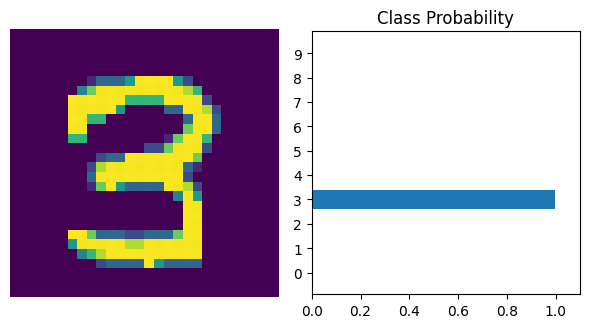

In [15]:
# make a prediction on a single image

# 1. get a single batch of images and labels from the validation loader.
images, labels = next(iter(valloader))

# 2. prepare a single image for the model.
# select the first image and flatten it into a [1, 784] tensor.
# The '1' is the batch size for this single prediction.
img = images[0].view(1, 784)

# 3. predict the class of the image.
# 'torch.no_grad()' disables gradient calculation for faster, more memory-efficient inference.
with torch.no_grad():
    logps = model(img) # forward pass to get the log probabilities.

# 4. convert the output from log probabilities to actual probabilities.
ps = torch.exp(logps)
probab = list(ps.numpy()[0])

# 5. print the model's prediction (the digit with the highest probability).
print("Predicted Digit =", probab.index(max(probab)))

# 6. (optional) call a helper function to visualize the image and its probability distribution.
view_classify(img.view(1, 28, 28), ps)

In [16]:
# this displays the number of images tested along with the model accuracy.

# initialize counters for tracking correct predictions and total images.
correct_count, all_count = 0, 0

# iterate through each batch of images and labels in the validation set.
for images, labels in valloader:
  # this inner loop processes each image in the batch one by one.
  for i in range(len(labels)):
    # prepare a single image.
    img = images[i].view(1, 784)

    # perform inference to get the model's prediction.
    with torch.no_grad():
        logps = model(img)

    # convert output to probabilities and find the predicted digit.
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))

    # get the true label for comparison.
    true_label = labels.numpy()[i]

    # if the prediction is correct, increment the correct_count.
    if true_label == pred_label:
      correct_count += 1

    # increment the total count of images processed.
    all_count += 1

# print the final results.
print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count / all_count))

Number Of Images Tested = 6000

Model Accuracy = 0.9631666666666666


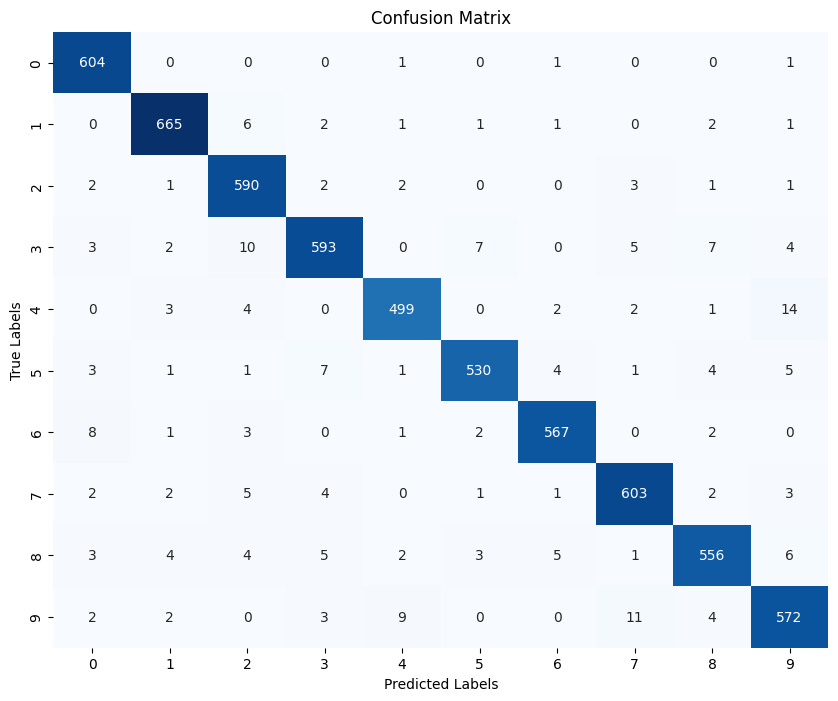

Class 0:
True Positives: 604,
True Negatives: 5370,
False Positives: 23,
False Negatives: 3

Class 1:
True Positives: 665,
True Negatives: 5305,
False Positives: 16,
False Negatives: 14

Class 2:
True Positives: 590,
True Negatives: 5365,
False Positives: 33,
False Negatives: 12

Class 3:
True Positives: 593,
True Negatives: 5346,
False Positives: 23,
False Negatives: 38

Class 4:
True Positives: 499,
True Negatives: 5458,
False Positives: 17,
False Negatives: 26

Class 5:
True Positives: 530,
True Negatives: 5429,
False Positives: 14,
False Negatives: 27

Class 6:
True Positives: 567,
True Negatives: 5402,
False Positives: 14,
False Negatives: 17

Class 7:
True Positives: 603,
True Negatives: 5354,
False Positives: 23,
False Negatives: 20

Class 8:
True Positives: 556,
True Negatives: 5388,
False Positives: 23,
False Negatives: 33

Class 9:
True Positives: 572,
True Negatives: 5362,
False Positives: 35,
False Negatives: 31



In [17]:
from sklearn.metrics import confusion_matrix, classification_report # if using terminal/vscode, use pip sklearn
import seaborn as sns

# set the model to evaluation mode
model.eval()

# empty lists to store true and predicted labels
true_labels = []
pred_labels = []

# iterate through the validation data loader to collect predictions.
for images, labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)

        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]

        true_labels.append(true_label)
        pred_labels.append(pred_label)

# create a confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# print true positives, true negatives, false positives, false negatives for each class
for i in range(10):  # assuming 10 classes
    tp = conf_matrix[i, i]
    tn = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
    fp = np.sum(conf_matrix[:, i]) - tp
    fn = np.sum(conf_matrix[i, :]) - tp
    print(f"Class {i}:")
    print(f"True Positives: {tp},\nTrue Negatives: {tn},\nFalse Positives: {fp},\nFalse Negatives: {fn}")
    print()


# CONFUSION MATRIX
# A confusion matrix is a performance measurement for machine learning classification problem where output can be two or more classes.
# It is a table with 4 different combinations of predicted and actual values. It is extremely useful for measuring Recall, Precision, Specificity, Accuracy, and most importantly AUC-ROC curves.
# Say, for a set to determine whether a person has cancer:
# Predicted Values: Positive, Negative
# Actual Values: True, False
# +: HAS CANCER, -: DOES NOT HAVE CANCER

# True Positive: Predicted positive, actually is true (+)
# True Negative: Predicted negative, actually is true (-)
# False Positive (Type-I):  Predicted positive, actually is false (-)
# False Negative (Type-II): Predicted negative, actually is false (+)

# In a confusion matrix, one axis is for predicted values and the other is for true values.
# The intersection of positives/negatives on each give us particular values for calculation.
# PRECISION: TP/(TP+FP) ---> from all classes predicted as positive, how many are actually correct
# ACCURACY: (TP+TN)/Total ---> from both positive and negative classes, how many have been predicted correctly
# RECALL: TP/(TP+FN) ---> from all positive classes, how many were predicted correctly
# F1 SCORE: (2*RECALL*PRECISION)/(RECALL+PRECISION) ---> to make precision and recall comparable, harmonic mean is taken in place of arithmetic mean so as to punish extreme values


In [18]:
# 3. print a detailed classification report.
# This provides precision, recall, and F1-score for each class.
target_names = [str(i) for i in range(10)]
print(classification_report(true_labels, pred_labels, target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       607
           1       0.98      0.98      0.98       679
           2       0.95      0.98      0.96       602
           3       0.96      0.94      0.95       631
           4       0.97      0.95      0.96       525
           5       0.97      0.95      0.96       557
           6       0.98      0.97      0.97       584
           7       0.96      0.97      0.97       623
           8       0.96      0.94      0.95       589
           9       0.94      0.95      0.95       603

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000



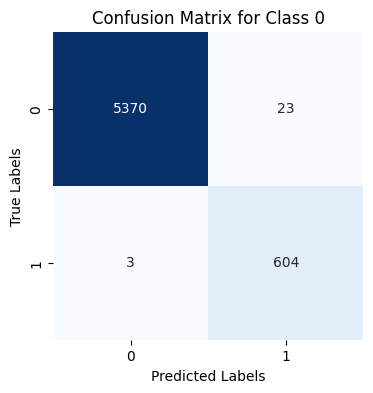

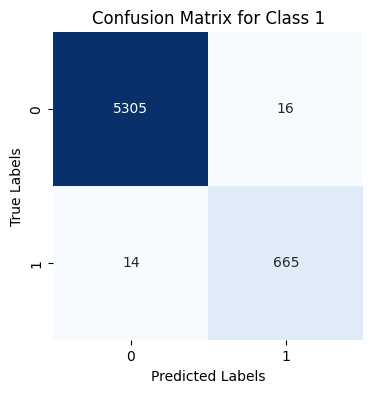

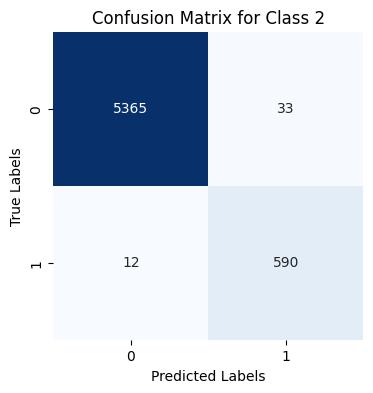

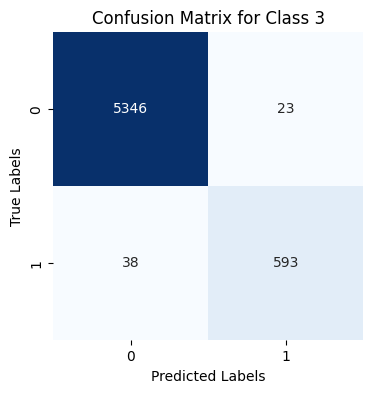

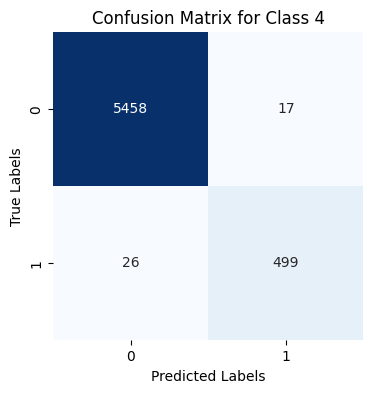

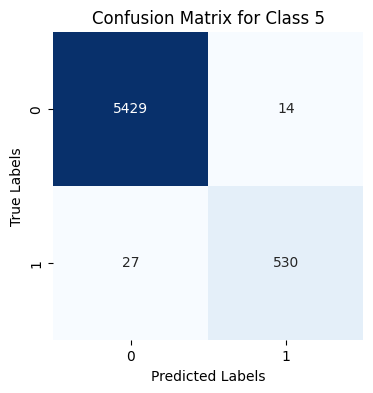

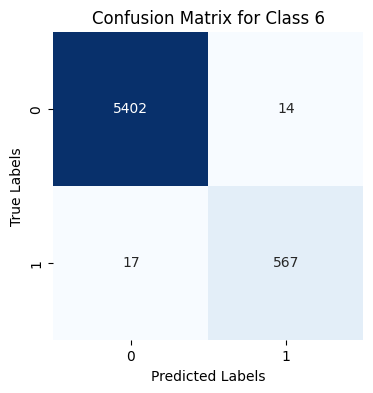

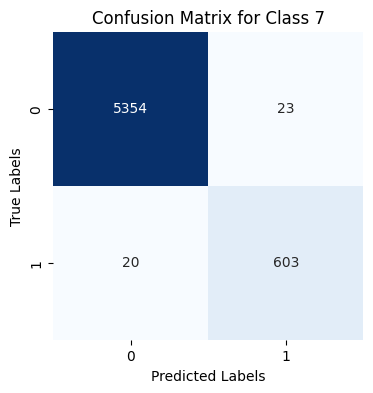

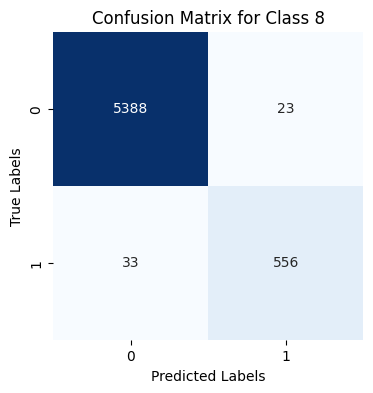

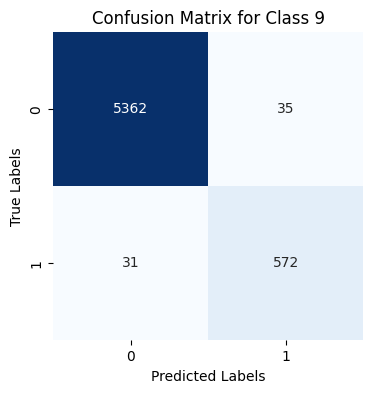

In [19]:
# (OPTIONAL) - individual confusion matrices for each class vs the rest of the classes

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# set the model to evaluation mode
model.eval()

# iterate through the validation data loader
for k in range(10):
    # lists to store true and predicted labels
    true_labels = []
    pred_labels = []

    absolute_true=k
    for images, labels in valloader:
        for i in range(len(labels)):
            img = images[i].view(1, 784)
            with torch.no_grad():
                logps = model(img)

            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]

            if true_label==absolute_true:
                true_labels.append(1)
            else:
                true_labels.append(0)
            if pred_label==absolute_true:
                pred_labels.append(1)
            else:
                pred_labels.append(0)

    # create a confusion matrix
    conf_matrix = confusion_matrix(true_labels, pred_labels)

    # plot the confusion matrix using seaborn
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for Class {k}")
    plt.show()

Predicted Digit = 3


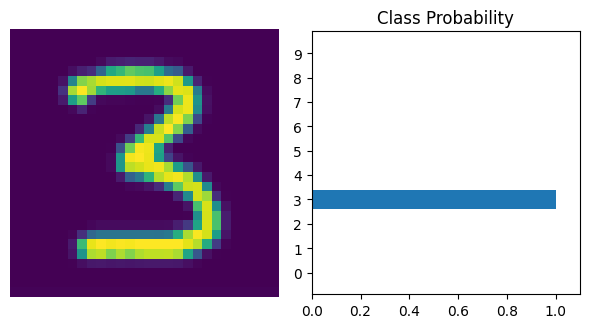

In [ ]:
# (OPTIONAL) - try with your own image
# if the image has a (white) handwritten digit over a black background, use this, else comment the whole cell out

# 1. create an image of any digit (0-9) from an image editor/download it from the MNIST dataset/scan an image of your own
# 2. in your working directory, create a new folder named 'whiteonblack' and upload the image in it

from PIL import Image, ImageOps
import os

def preprocess_user_image(image_path):
    user_image = Image.open(image_path).convert("L")
    user_image = user_image.resize((28, 28))
    user_image = transform(user_image).view(1, 784)
    return user_image

# get the path to the user's image
for image in os.listdir('whiteonblack'):
    user_image_path = os.path.join("whiteonblack/", image)
    if os.path.isfile(user_image_path):
        # preprocess the user's image
        user_input = preprocess_user_image(user_image_path)

        # use the trained model to make a prediction
        with torch.no_grad():
            logps = model(user_input)
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])

        predicted_digit = probab.index(max(probab))
        print("Predicted Digit =", predicted_digit)
        view_classify(user_input.view(1, 28, 28), ps)

Predicted Digit = 5


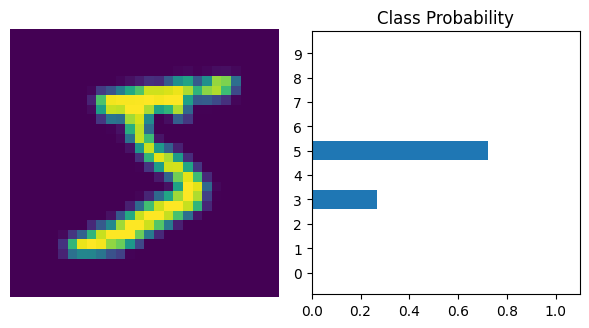

In [ ]:
# (OPTIONAL) - try with your own image
# if the image has a (black) handwritten digit over a white background, use this, else comment the whole cell out

# 1. create an image of any digit (0-9) from an image editor/download it from the MNIST dataset/scan an image of your own
# 2. in your working directory, create a new folder named 'blackonwhite' and upload the image in it

from PIL import Image, ImageOps
import os

def preprocess_user_image(image_path):
    user_image = Image.open(image_path).convert("L")
    user_image = ImageOps.invert(user_image)  # add this line to invert image colors to the MNIST dataset form on which we have trained the model
    user_image = user_image.resize((28, 28))
    user_image = transform(user_image).view(1, 784)
    return user_image

# get the path to the user's image
for image in os.listdir('blackonwhite'):
    user_image_path = os.path.join("blackonwhite/", image)
    if os.path.isfile(user_image_path):
        # preprocess the user's image
        user_input = preprocess_user_image(user_image_path)

        # use the trained model to make a prediction
        with torch.no_grad():
            logps = model(user_input)
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])

        predicted_digit = probab.index(max(probab))
        print("Predicted Digit =", predicted_digit)
        view_classify(user_input.view(1, 28, 28), ps)


# The above 2 cells are to be separately used depending on your user input. This is because the MNIST dataset has grayscale images,
# meaning the pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).
# What matters to a neural net are the pixel values 0 (background) and 255 (foreground),
# though you can assign different colours to these pixel values when plotting the images.

# A neural net trained on images with 0 as background and 255 as foreground will not be able to recognize images with inverted colours.
# You would have a train a neural net on both types of images if you want it to work on both.
# Alternatively, you can flip the colours of your original image for it to work.